In [50]:
import loaders

In [51]:
loaderHR = loaders.DataLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR'])

In [52]:
patients = loaderHR.get_subset(max_patients=100, min_time_points=30, fill_type="ffill")

Patient 1: Less than 30 time points — skipping.
Patient 3: Less than 30 time points — skipping.
Patient 5: Less than 30 time points — skipping.
Patient 9: Less than 30 time points — skipping.
Patient 11: Less than 30 time points — skipping.
Patient 14: Less than 30 time points — skipping.
Patient 15: Less than 30 time points — skipping.
Patient 19: Less than 30 time points — skipping.
Patient 21: Less than 30 time points — skipping.
Patient 22: Less than 30 time points — skipping.
Patient 25: Less than 30 time points — skipping.
Patient 26: Less than 30 time points — skipping.
Patient 33: Less than 30 time points — skipping.
Patient 35: Less than 30 time points — skipping.
Patient 36: Less than 30 time points — skipping.
Patient 39: Less than 30 time points — skipping.
Patient 44: Less than 30 time points — skipping.
Patient 46: Less than 30 time points — skipping.
Patient 47: Less than 30 time points — skipping.
Patient 48: Less than 30 time points — skipping.
Patient 52: Less than 30

In [24]:
patients

HR
Patient_ID ICULOS       
0          0        97.0
           1        97.0
           2        89.0
           3        90.0
           4       103.0
...                  ...
99         48       67.0
           49       71.0
           50       68.0
           51       67.0
           52       78.0

[6417 rows x 1 columns]

In [53]:
y_train, y_test = loaderHR.split_train_test(patients, 4)

In [26]:
y_train

HR
Patient_ID ICULOS       
0          0        97.0
           1        97.0
           2        89.0
           3        90.0
           4       103.0
...                  ...
99         44       71.0
           45       70.0
           46       75.0
           47       81.0
           48       67.0

[6017 rows x 1 columns]

In [27]:
y_test

HR
Patient_ID ICULOS       
0          50       81.0
           51       85.0
           52       86.0
           53       84.0
1          254     120.0
...                  ...
98         58       88.0
99         49       71.0
           50       68.0
           51       67.0
           52       78.0

[400 rows x 1 columns]

In [54]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
model = AutoARIMA(seasonal=False, max_order=100)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

In [55]:
forecasts

HR
Patient_ID ICULOS            
0          50       75.525090
           51       86.411155
           52      102.430911
           53      102.430911
1          44       72.000000
...                       ...
98         52       60.201329
99         49       61.338059
           50       62.264179
           51       62.905183
           52       63.348845

[400 rows x 1 columns]

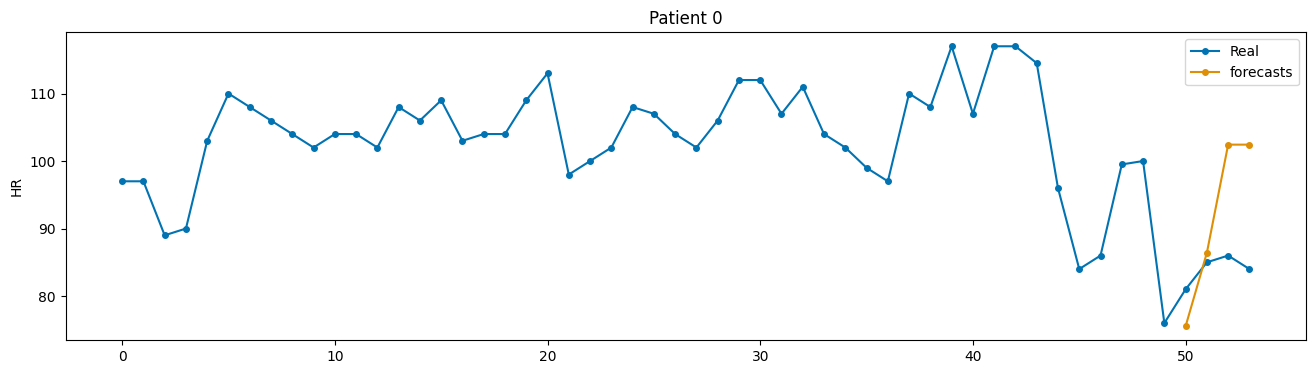

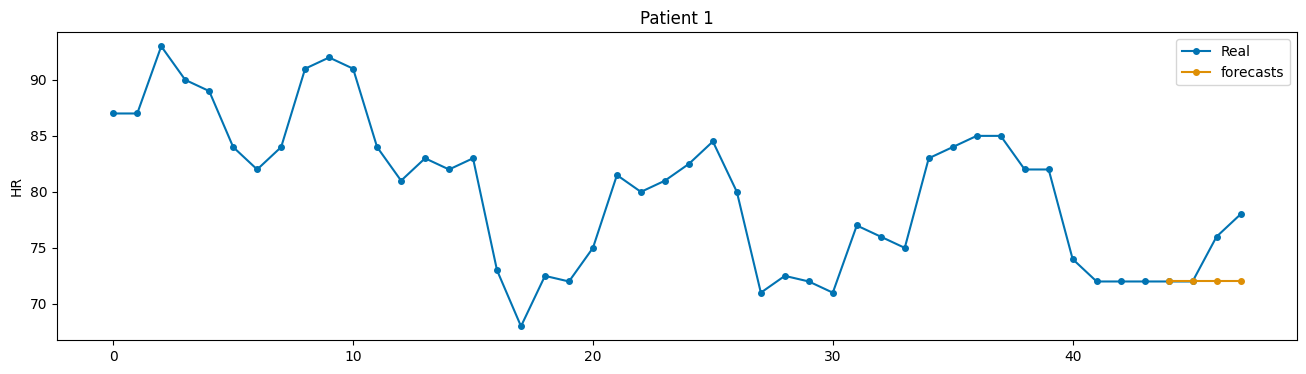

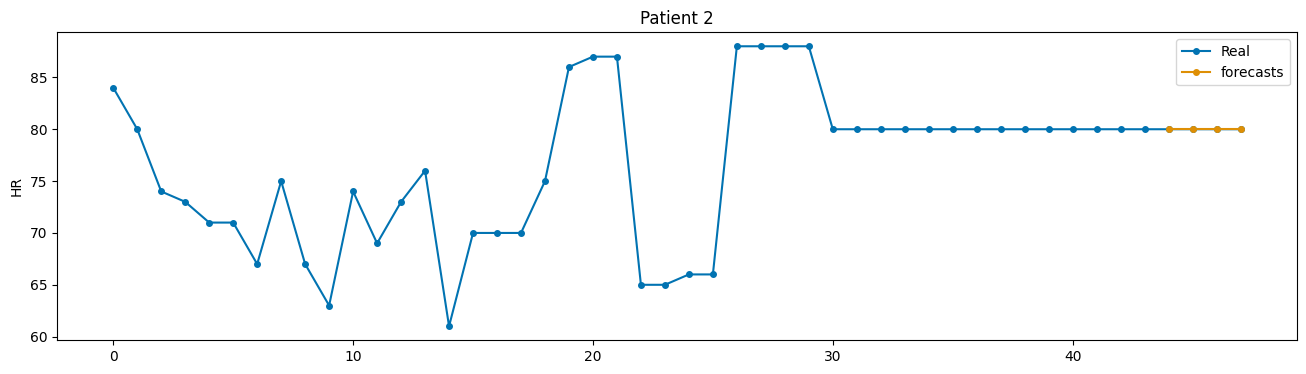

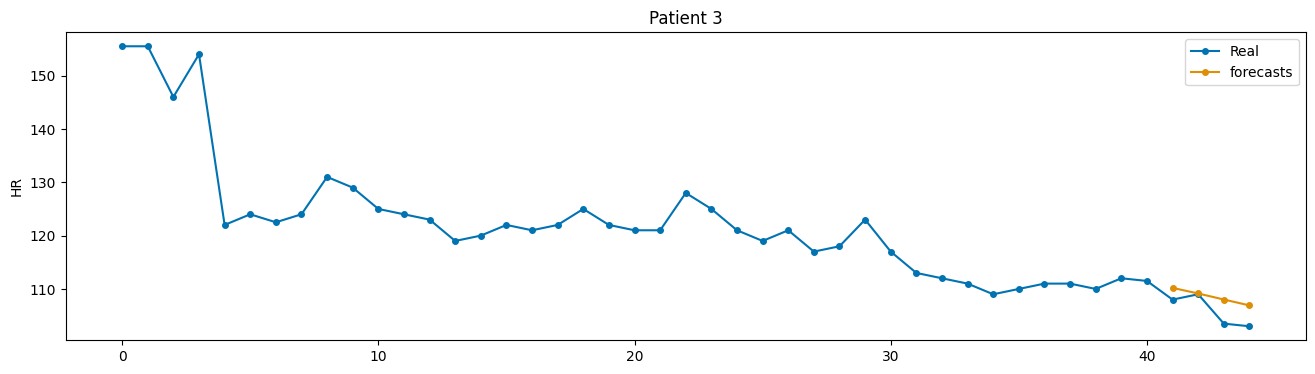

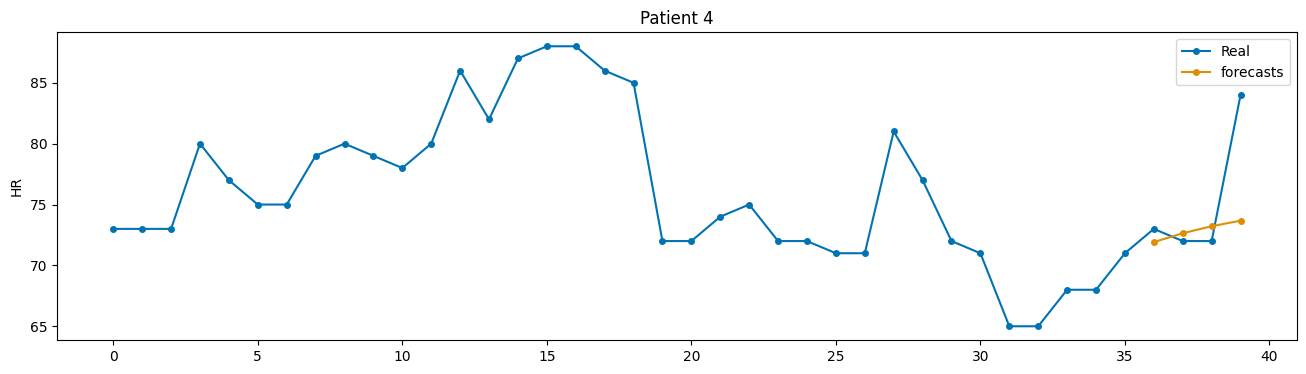

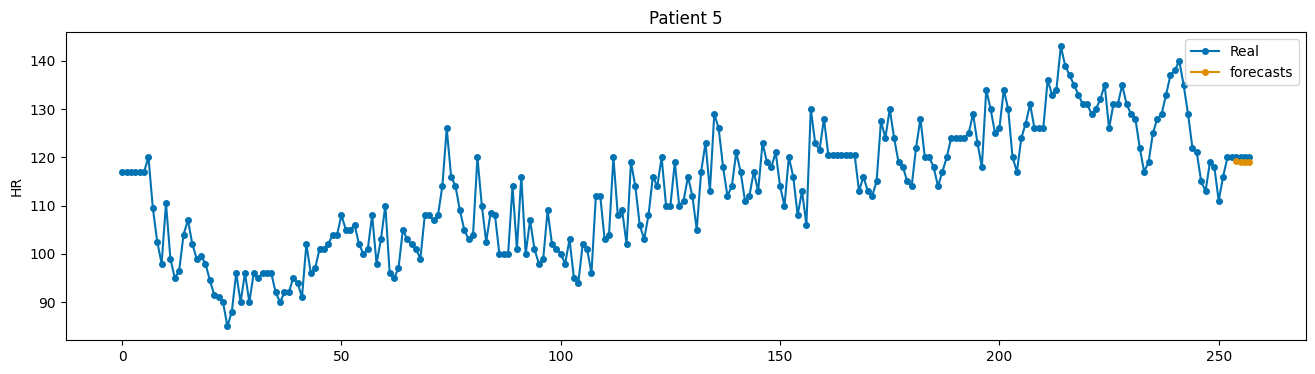

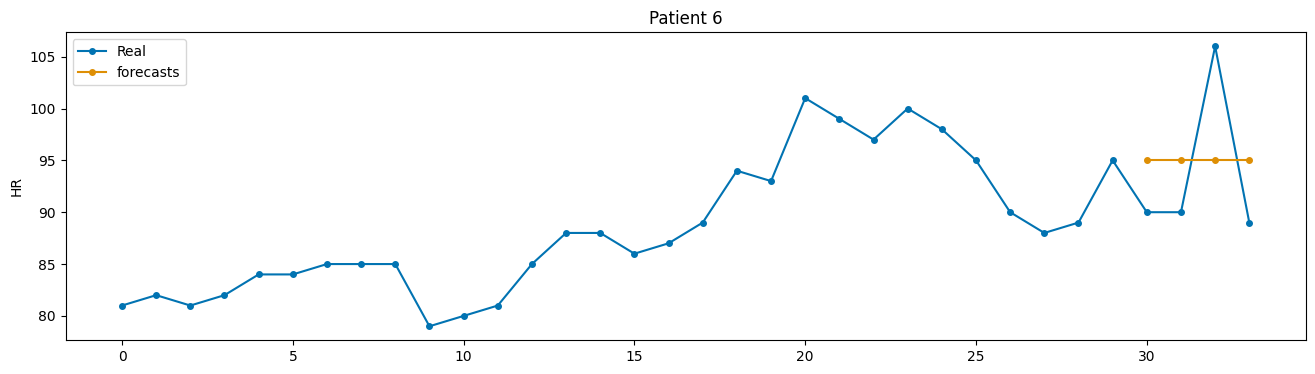

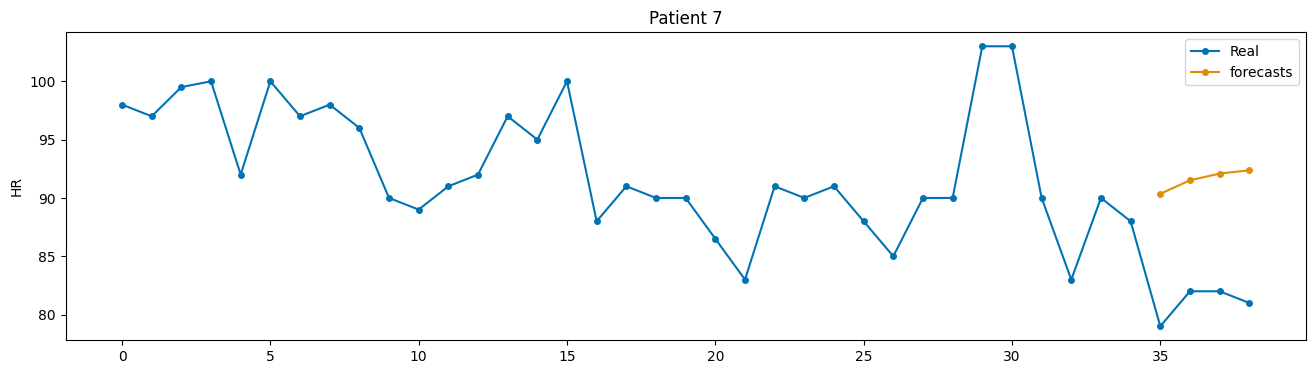

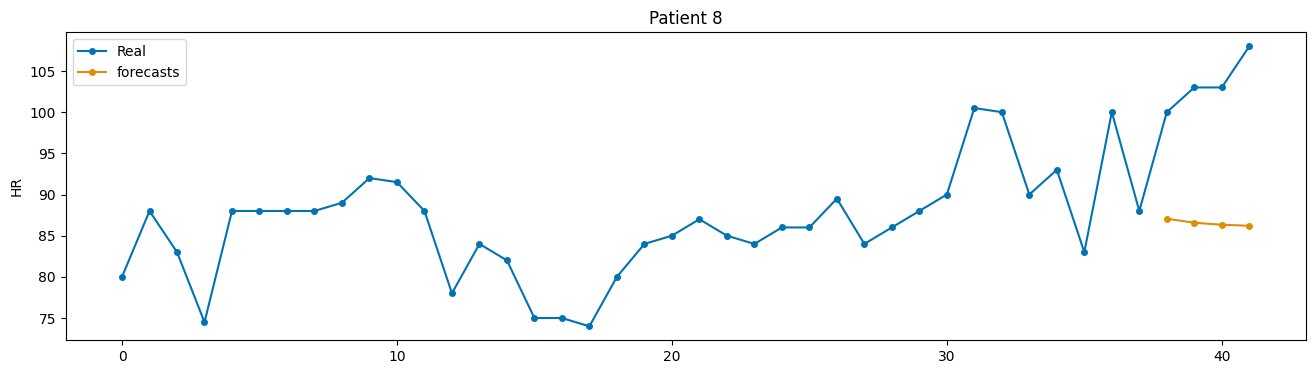

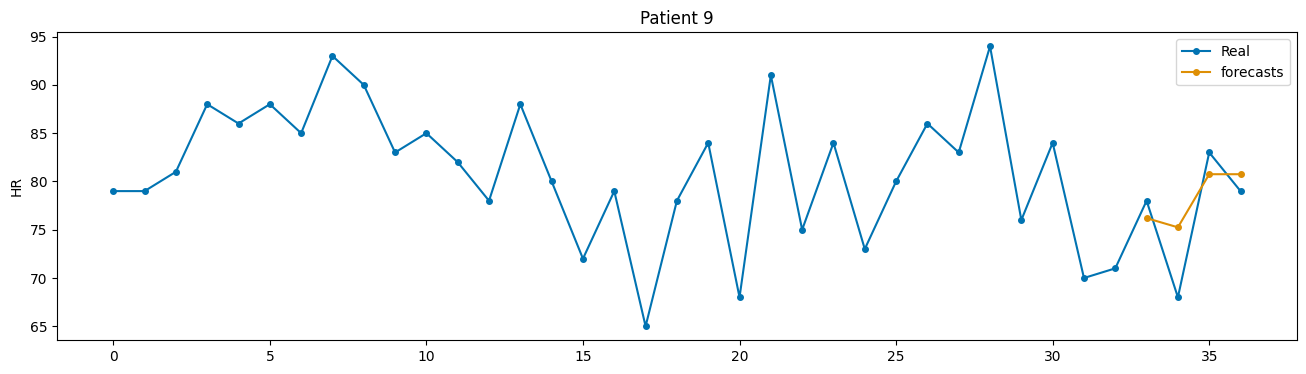

In [56]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

for i in range(0, 10):
    plot_series(patients.loc[i], forecasts.loc[i], labels=["Real", "forecasts"])
    plt.title(f"Patient {i}")

In [57]:
import numpy as np
from sktime.distances import dtw_distance

from sktime.distances import dtw_distance
import numpy as np

dtw_list = []

for pid in y_test.index.get_level_values("Patient_ID").unique():
    for feature in y_test.columns:
        timeseries = y_test.loc[pid, feature]
        forecasted_timeseries = forecasts.loc[pid, feature]
        
        x = np.array(timeseries)
        y = np.array(forecasted_timeseries)
        
        dtw_val = dtw_distance(x, y)
        dtw_list.append(dtw_val)

average_dtw = np.median(dtw_list)
print("Average DTW:", average_dtw)

Average DTW: 133.94178160277676


In [19]:
dtw_list

[641.63927766605,
 52.0,
 0.0,
 32.81992614023808,
 109.69447538922118,
 3.5209556659561745,
 207.0,
 450.4685059713711,
 1190.2080076031198,
 63.891778263557576,
 854.0,
 248.84387480939182,
 908.3196598233392,
 56.66573824017105,
 34.74082636744795,
 454.0,
 39.53824305912873,
 42.0,
 416.3168291831998,
 523.0,
 326.22674062306623,
 0.005782838192505313,
 341.85429506209147,
 66.17669177400691,
 600.0514075304433,
 200.441281517182,
 557.8179749050594,
 183.47823060953002,
 96.8193188658167,
 132.28340782000762,
 48.97777891042494,
 15.0,
 360.2727413580332,
 61.271756655690496,
 3912.7829976830835,
 186.6678919459019,
 236.84406206766025,
 16.0,
 73.0,
 51.0,
 323.0877934802291,
 503.32226575607547,
 177.7429351143388,
 213.04906369158783,
 105.32375188082328,
 290.35239907220443,
 421.664558494294,
 63.86714151136411,
 135.29342123873792,
 254.14851635512787,
 34.80880676313005,
 160.3840598290387,
 41.70189198510318,
 265.0,
 89.09575135499247,
 139.27867736954076,
 224.1372748459

{'whiskers': [<matplotlib.lines.Line2D at 0x17fbc60d2a0>,
 'caps': [<matplotlib.lines.Line2D at 0x17fd93e7a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fbc60dc00>],
 'medians': [<matplotlib.lines.Line2D at 0x17fd93e5090>],
 'fliers': [<matplotlib.lines.Line2D at 0x17fd93e78e0>],
 'means': []}

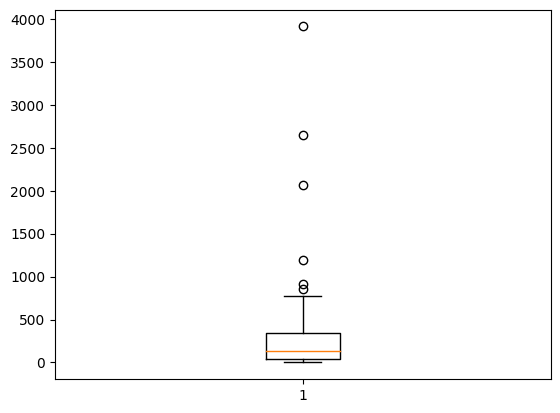

In [49]:
# box plot dtw_list
import matplotlib.pyplot as plt
plt.boxplot(dtw_list)